#**Name:** Varsha
#**Roll No:** 200030040

##**AIM**


*   To understand the nature of autocorrelation sequence
*   To develop a method for the estimation of pitch by the autocorrelation function of speech signal



## **THEORY**

*   In autocorrelation, the interest is in observing how similar the signal characteristics with respect to time. This is achived by providing different time lag for the sequence and computing with the given sequence as reference.
*   The autocorrelation is a very useful tool in case of speech processing. However due to the non-stationary nature of speech, a short term version of the autocorrelation is needed.
*   The nature of short term autocorrelation sequence is primarily different for voiced and unvoiced segments of speech. Hence information from the autocorrelation sequence can be used for discriminating voiced and unvoiced segments.
*   The nature of autocorrelation sequence in case of autocorrelation of voiced speech can be explained for finding the periodicity of voiced speech. Accordingly, the autocorrelation of voiced speech should give strong peak at the periodic value and no such peak in case of unvoiced speech. Therefore, the autocorrelation of speech has become a standard approach for enhancing pitch .

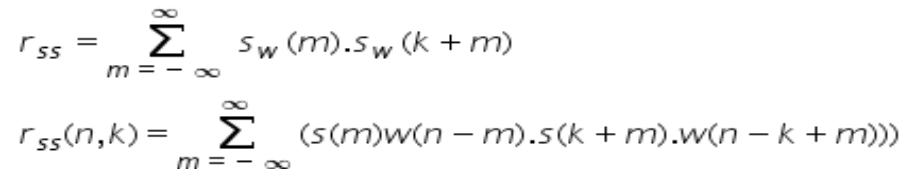


In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/qingkaikong/blog/master/2017_02_intuitive_autocorrelation/figures/autocorrelation_example.gif')

**Drive link :** https://drive.google.com/file/d/1SlUp0mnyVrksPVcqgOnhipQtdLNf1gJo/view?usp=sharing

##**CODE:**

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import IPython.display as ipd
import numpy as np
from scipy.fft import fft, fftfreq, fftshift
import librosa
import librosa.display
import math
from scipy.io import wavfile
import soundfile as sf



In [ ]:
signal,sr= librosa.load('lab_5.wav',sr=16000)
ipd.Audio(signal, rate=sr)

In [ ]:
def auto_correlation(sig,a):
  autocorrelation = np.correlate(sig, sig, mode='full')

  # Normalize the autocorrelation values to have a maximum of 1
  autocorrelation /= np.max(autocorrelation)
  # Create a time lag axis for the autocorrelation plot
  time_lags = np.arange(0, len(sig))
  # Plot only the positive part of the autocorrelation
  plt.figure(figsize=(10, 4))
  plt.plot(time_lags, autocorrelation[len(sig)-1:])
  plt.title('Autocorrelation of Speech Signal')
  plt.xlabel('Time Lag (samples)')
  plt.ylabel('Autocorrelation')
  plt.grid(True)
  plt.show()
  x_interval = time_lags[10:319]
  y_interval = autocorrelation[329:639]
  if a==1:
    peak_index = np.argmax(y_interval)
    peak_x = x_interval[peak_index]
    peak_y = y_interval[peak_index]
    print(f"Pitch Frequency is {16000/peak_x}")
  # Find the peak within the interval


In [ ]:
A = signal[int(1.16 * sr): int(1.5 * sr)]
ipd.Audio(A, rate=sr)

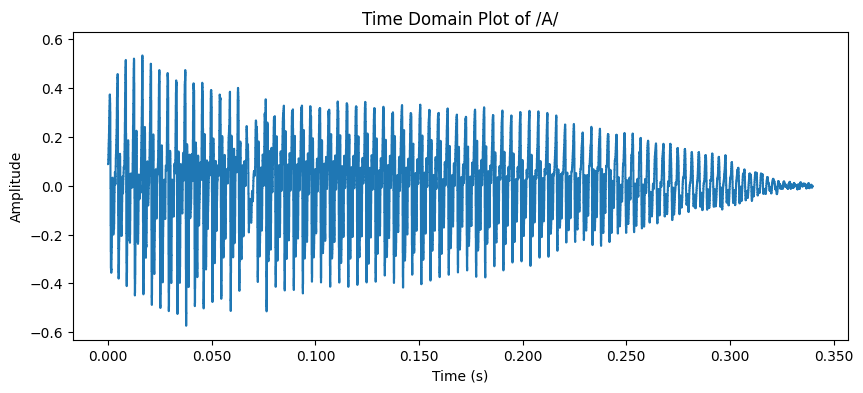

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(A, sr=16000);
plt.title("Time Domain Plot of /A/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
A_mid = signal[int(1.32 * sr): int(1.34 * sr)]
ipd.Audio(A_mid, rate=sr)

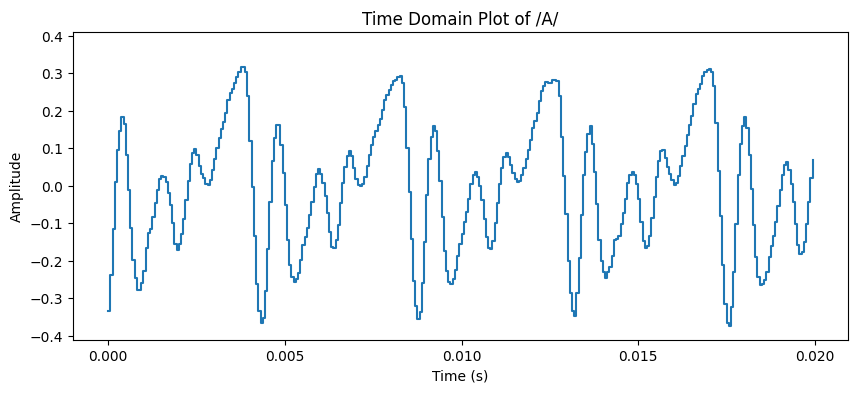

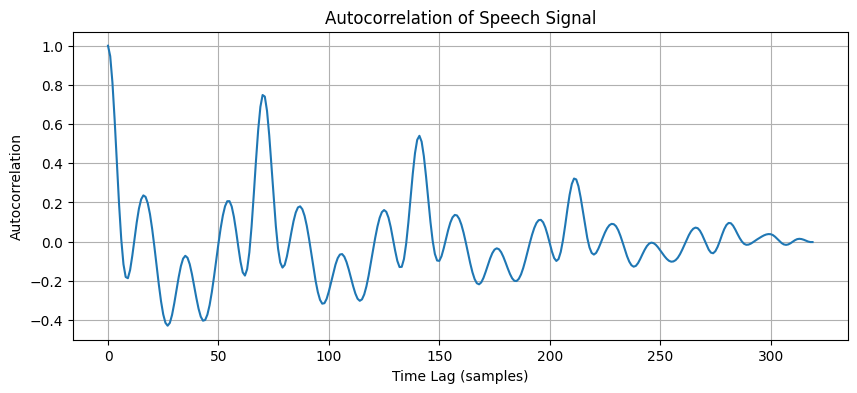

Pitch Frequency is 228.57142857142858


In [ ]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(A_mid, sr=16000);
plt.title("Time Domain Plot of /A/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
auto_correlation(A_mid,1)

In [ ]:
pa = signal[int(6.32 * sr): int(6.36 * sr)]
ipd.Audio(pa, rate=sr)

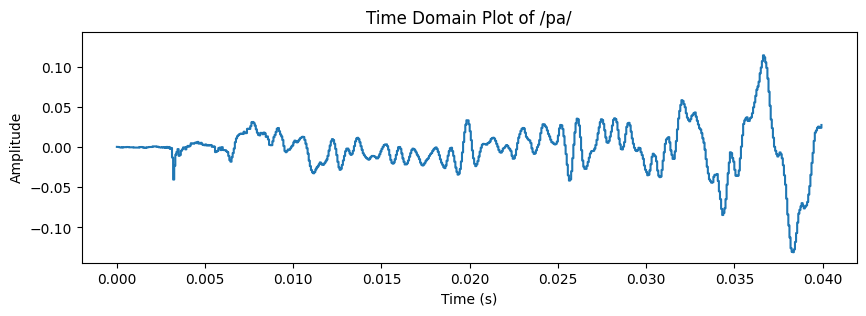

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(pa, sr=16000);
plt.title("Time Domain Plot of /pa/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
pa_mid = signal[int(6.33 * sr): int(6.35 * sr)]
ipd.Audio(pa_mid, rate=sr)

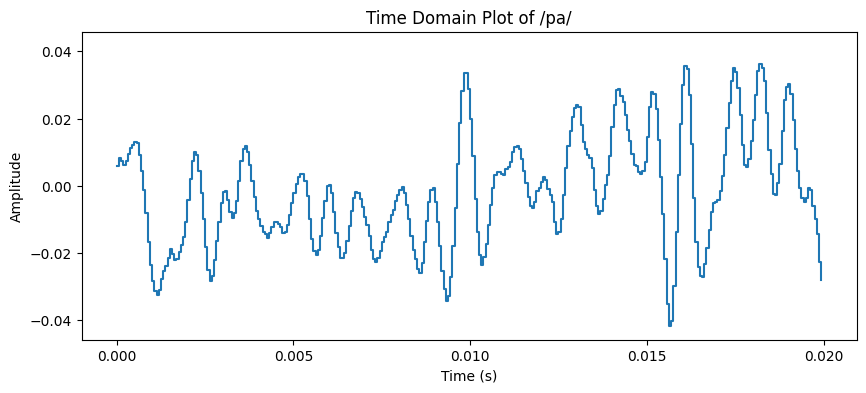

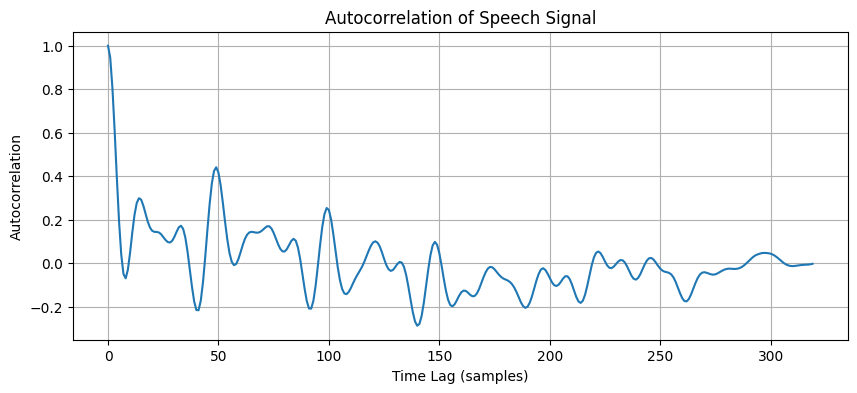

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(pa_mid, sr=16000);
plt.title("Time Domain Plot of /pa/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
auto_correlation(pa_mid,0)

In [ ]:
silence = signal[int(2.7 * sr): int(3.5 * sr)]
ipd.Audio(silence, rate=sr)

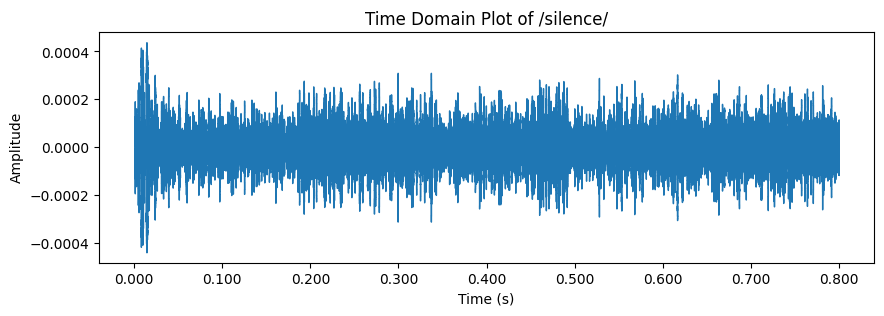

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(silence, sr=16000);
plt.title("Time Domain Plot of /silence/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
silence_mid = signal[int(3.09 * sr): int(3.11 * sr)]
ipd.Audio(silence_mid, rate=sr)

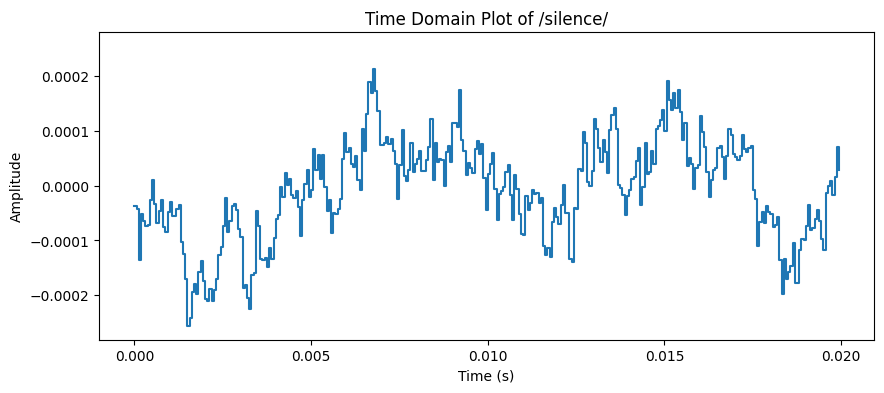

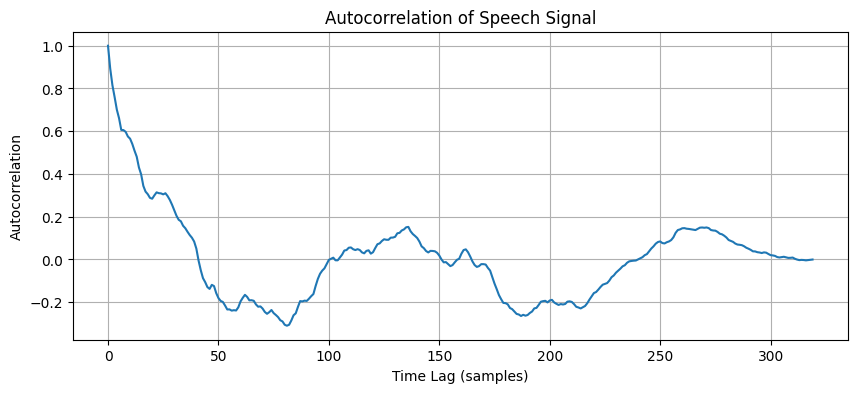

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(silence_mid, sr=16000);
plt.title("Time Domain Plot of /silence/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
auto_correlation(silence_mid,0)